   Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g  


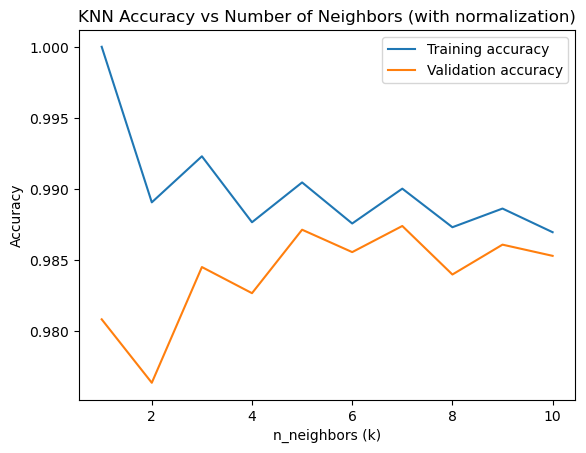

Best k based on validation set: 7
Final test accuracy: 0.9881703470031545


In [ ]:
# ====================================
# STEP 1: Import libraries
# ====================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# ====================================
# STEP 2: Load your CSV file
# ====================================
data = pd.read_csv("telescope_data.csv")  # Change to your actual file name
print(data.head())

# ====================================
# STEP 3: Split features (X) and target (y)
# ====================================
X = data.drop("class", axis=1)  # All features
y = data["class"]               # Target/labels

# ====================================
# STEP 4: Split into train and test (80/20)
# ====================================
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0
)

# ====================================
# STEP 5: Split training data into train and validation (75/25)
# ====================================
# So final ratios: 60% train, 20% validation, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42
)

# ====================================
# STEP 6: Apply Normalization (Min-Max Scaling)
# ====================================
scaler = MinMaxScaler()

# Fit scaler on training data only
scaler.fit(X_train)

# Transform all splits
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)
X_train_full_norm = scaler.transform(X_train_full)

# ====================================
# STEP 7: Try different k values
# ====================================
training_accuracy = []
validation_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_norm, y_train)

    training_accuracy.append(clf.score(X_train_norm, y_train))
    validation_accuracy.append(clf.score(X_val_norm, y_val))

# ====================================
# STEP 8: Plot accuracy curves
# ====================================
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, validation_accuracy, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors (k)")
plt.legend()
plt.title("KNN Accuracy vs Number of Neighbors (with normalization)")
plt.show()

# ====================================
# STEP 9: Pick best k based on validation accuracy
# ====================================
best_k = neighbors_settings[validation_accuracy.index(max(validation_accuracy))]
print("Best k based on validation set:", best_k)

# ====================================
# STEP 10: Retrain model on full training data (train + val)
# ====================================
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_full_norm, y_train_full)

# ====================================
# STEP 11: Evaluate final model on test data
# ====================================
test_accuracy = final_model.score(X_test_norm, y_test)
print("Final test accuracy:", test_accuracy)
